# Preliminaries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
sns.set_theme(context='paper')

import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [2]:
from dissipationtheory.constants import ureg, epsilon0, qe
from dissipationtheory.dissipation9a import CantileverModel, SampleModel1, SampleModel3
from dissipationtheory.dissipation9b import SampleModel1Jit, SampleModel3Jit
from dissipationtheory.dissipation19e import pointprobeCobject, ExptSweepConductivity, latex_float

In [3]:
from dissipationtheory.dissipation19e import plot_LDS, plot_LDS_zero, plot_friction, plot_friction_list

In [4]:
THIS = 'dissipation-theory--Study-75--'
figs = {}
obj = {}

# Cantilever and tip-sample separation

In [5]:
cantilever = CantileverModel(
    f_c = ureg.Quantity(75, 'kHz'),
    k_c = ureg.Quantity(2.8, 'N/m'), 
    V_ts = ureg.Quantity(1, 'V'), 
    R = ureg.Quantity(35, 'nm'),
    angle = ureg.Quantity(20, 'degree'),
    L = ureg.Quantity(2000, 'nm'))

Taking $h = 75 \: \mathrm{nm}$ gives $z_{\mathrm{c}} =  h + R = 110 \: \mathrm{nm}$.

In [6]:
h = ureg.Quantity(75, 'nm')

# Sweep parameters

In [7]:
N_omega = 100 # 10 or 100
N_sigma = 200 # 20 or 200

Set up an array of $\omega_{\mathrm{m}}$ values.

In [8]:
omega_m__array = ureg.Quantity(
    np.logspace(
        start=np.log10(1e1),
        stop=np.log10(1e8),
        num=N_omega), 'Hz')

Set up an array of conductivity $\sigma$ values.

In [9]:
sigma__array = ureg.Quantity(
    np.logspace(
        start=np.log10(1e-10),
        stop=np.log10(1e0),
        num=N_sigma), 'S/m')

Compute the charge density $\rho = \sigma \big/ q_e \mu$ corresponding to a mobility of $\mu = 10^{-8} \: \mathrm{m}^2 \mathrm{V}^{-1} \mathrm{s}^{-1}$.

In [10]:
mu = ureg.Quantity(1e-8, 'm^2/(V s)') 
rho__array = (sigma__array / (qe * mu)).to('1/m^3')

# Sample parameters

In [11]:
sample3 = SampleModel3(
    cantilever = cantilever,
    epsilon_s = ureg.Quantity(complex(2.8, -0.20), ''),
    sigma = sigma__array[0],
    rho = rho__array[0],
    z_r = ureg.Quantity(1, 'nm'))

sample3_jit = SampleModel3Jit(**sample3.args())

# Vary conductivity and charge density

In [12]:
expt = {}

The following simulation takes 2 to 3 minutes.

In [13]:
%%time

expt['01'] = ExptSweepConductivity('perovskite-like sample')

obj = expt['01'].calculate(
    sample3_jit, 
    h, 
    ureg.Quantity(250.,'Hz'),
    omega_m__array,
    rho__array,
    sigma__array)

CPU times: user 19min 2s, sys: 1min 42s, total: 20min 45s
Wall time: 2min 58s


In [14]:
expt['01'].df.iloc[::10]

,sigma [S/m],rho [1/cm^3],L_D [nm],rho scaled 1,rho scaled 2,rho scaled 3,omega0 [Hz],omega_c [Hz],omega_c scaled,omega_m [Hz],omega_m scaled,gamma [pN s/m],f_LDS [Hz],f_BLDS [Hz]
0,1.000000e-10,6.241509e+10,4784.333412,5.286187e-04,0.000189,0.000024,1.129409e+01,471238.898038,0.000009,"[10.0, 11.768119524349984, 13.848863713938732,...","[2.4791725875840003, 2.9175199332180544, 3.433...",0.750438,"[-0.16293451669573897, -0.16293445766471962, -...","[-0.07128342340044011, -0.07128340509895487, -..."
10,3.180626e-10,1.985190e+11,2682.657048,1.681338e-03,0.000600,0.000078,3.592227e+01,471238.898038,0.000027,"[10.0, 11.768119524349984, 13.848863713938732,...","[0.7794606555561382, 0.9172786159112827, 1.079...",0.750582,"[-0.16298537446015537, -0.16298527544098462, -...","[-0.07130487004766735, -0.07130483957740204, -..."
20,1.011638e-09,6.314148e+11,1504.211396,5.347707e-03,0.001910,0.000247,1.142553e+02,471238.898038,0.000087,"[10.0, 11.768119524349984, 13.848863713938732,...","[0.24506519497784626, 0.2883956505757428, 0.33...",0.751039,"[-0.16313981861463883, -0.16313975657518345, -...","[-0.07137068211619298, -0.0713706643054417, -0..."
30,3.217642e-09,2.008294e+12,843.436892,1.700905e-02,0.006075,0.000785,3.634034e+02,471238.898038,0.000275,"[10.0, 11.768119524349984, 13.848863713938732,...","[0.07704936658628357, 0.0906726155262843, 0.10...",0.752494,"[-0.1635932354974332, -0.16359323576655077, -0...","[-0.07156683735467695, -0.0715668423814341, -0..."
40,1.023411e-08,6.387632e+12,472.929398,5.409944e-02,0.019321,0.002496,1.155850e+03,471238.898038,0.000876,"[10.0, 11.768119524349984, 13.848863713938732,...","[0.024224594161093245, 0.028507791951661605, 0...",0.757121,"[-0.1648599279554638, -0.164859976469711, -0.1...","[-0.07212129066455397, -0.0721213146612296, -0..."
50,3.255089e-08,2.031667e+13,265.179551,1.720701e-01,0.061454,0.007938,3.676327e+03,471238.898038,0.002786,"[10.0, 11.768119524349984, 13.848863713938732,...","[0.00761629833273855, 0.008962950911277476, 0....",0.771821,"[-0.16813884254556632, -0.1681389221036906, -0...","[-0.07355805774824216, -0.07355809307741584, -..."
60,1.035322e-07,6.461971e+13,148.690680,5.472905e-01,0.195461,0.025247,1.169302e+04,471238.898038,0.008862,"[10.0, 11.768119524349984, 13.848863713938732,...","[0.00239459121203532, 0.002817983559518974, 0....",0.818439,"[-0.17572953182148887, -0.17572962082821683, -...","[-0.0768805109798475, -0.07688054998832235, -0..."
70,3.292971e-07,2.055311e+14,83.373391,1.740726e+00,0.621688,0.080301,3.719112e+04,471238.898038,0.028186,"[10.0, 11.768119524349984, 13.848863713938732,...","[0.000752867971060033, 0.0008859840269489334, ...",0.965265,"[-0.19077852155370703, -0.1907785963779366, -0...","[-0.08346518009603215, -0.08346521284036935, -..."
80,1.047371e-06,6.537175e+14,46.748877,5.536598e+00,1.977356,0.255406,1.182910e+05,471238.898038,0.089650,"[10.0, 11.768119524349984, 13.848863713938732,...","[0.00023670436064378617, 0.000278556520799092,...",1.416439,"[-0.21517513392334134, -0.21517518020832488, -...","[-0.09413899486857141, -0.09413901511926183, -..."
90,3.331295e-06,2.079231e+15,26.212890,1.760985e+01,6.289231,0.812352,3.762395e+05,471238.898038,0.285145,"[10.0, 11.768119524349984, 13.848863713938732,...","[7.442069061444509e-05, 8.757915822354608e-05,...",2.663222,"[-0.24632077815480347, -0.24632079852810965, -...","[-0.10776531076631991, -0.1077653196797324, -0..."


## LDS $\Delta f_{\mathrm{LDS}}$ versus $\omega_{\mathrm{m}}$ spectra

In [15]:
plt.rcParams['text.usetex'] = True

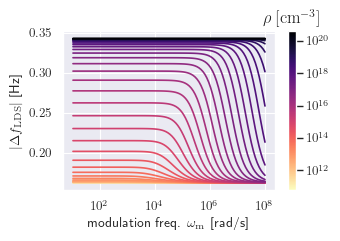

In [140]:
figs['01'] = plot_LDS(expt['01'], n=5, scaled=False)

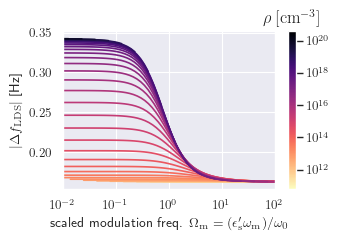

In [139]:
figs['02'] = plot_LDS(expt['01'], n=5, scaled=True)
figs['02'].axes[0].set_xlim([1e-2,1e2]);

## LDS $\Delta f_{\mathrm{LDS}}(\omega_{\mathrm{m}} = 0)$ versus charge density 

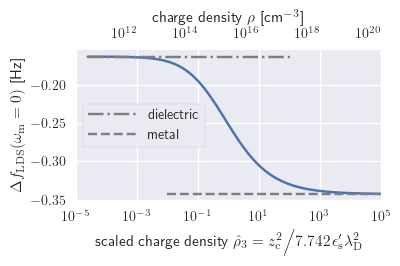

In [136]:
figs['03'] = plot_LDS_zero(expt['01'], obj)
figs['03'].axes[0].set_xlim([1e-5,1e5]);

## Friction

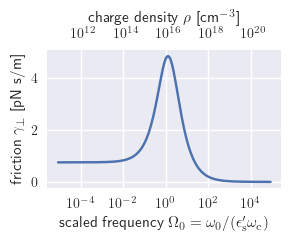

In [135]:
figs['04'] = plot_friction(expt['01'])

Vary $\epsilon_{\mathrm{s}}^{\prime\prime}$. \
The following similation is expected to take 12 to 15 minutes to run.

In [20]:
%%time

epsilon_s_start = sample3.epsilon_s
epsilon_list = [20-0.02j, 20-0.2j, 20-0.5j, 20-1j]

objs = {}
for key, epsilon_s in zip(['02a', '02b', '02c', '02d'], epsilon_list):
    
    sample3.epsilon_s = ureg.Quantity(epsilon_s, '')
    sample3_jit = SampleModel3Jit(**sample3.args())

    expt[key] = ExptSweepConductivity('perovskite-like sample')
    objs[key] = expt[key].calculate(
        sample3_jit, 
        h, 
        ureg.Quantity(250.,'Hz'),
        omega_m__array,
        rho__array,
        sigma__array)

sample3.epsilon_s = epsilon_s_start             # reset it
sample3_jit = SampleModel3Jit(**sample3.args()) # reset it

CPU times: user 59min 11s, sys: 6min 15s, total: 1h 5min 26s
Wall time: 8min 40s


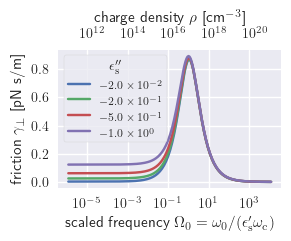

In [21]:
figs['05'] = plot_friction(expt['02a'])

with plt.style.context('seaborn-v0_8'):

    for key in ['02b', '02c', '02d']:

        figs['05'].axes[0].semilogx(
            expt[key].df['omega_c scaled'].values,
            np.array([row for row in expt[key].df['gamma [pN s/m]']]))

    figs['05'].axes[0].legend(
        [latex_float(ep.imag) for ep in epsilon_list], 
        title=r'$\epsilon_{\mathrm{s}}^{\prime\prime}$',
        fontsize=8,
        title_fontsize=10,
        frameon=True)

Vary $\mu$. \
The following similation is expected to take 12 to 15 minutes to run.

In [22]:
%%time

rho__array__start = rho__array # save it
mu_list = [ureg.Quantity(val, 'cm^2/(V s)') for val in [1e-6, 1e-4, 1e-3, 1e-2]]

for key, mu in zip(['03a', '03b', '03c', '03d'], mu_list):
    
    rho__array = (sigma__array / (qe * mu)).to('1/m^3')
    
    expt[key] = ExptSweepConductivity('perovskite-like sample')
    
    objs[key] = expt[key].calculate(
        sample3_jit, 
        h, 
        ureg.Quantity(250.,'Hz'),
        omega_m__array,
        rho__array,
        sigma__array)    
    
rho__array = rho__array__start # reset it

CPU times: user 57min 4s, sys: 6min 17s, total: 1h 3min 21s
Wall time: 8min 18s


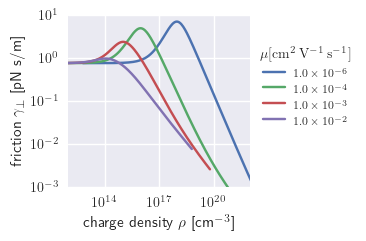

In [134]:
figs['06'] = plot_friction_list(expt, ['03a', '03b', '03c', '03d'])
figs['06'].gca().set_xlim([1e12,1e22]);
figs['06'].gca().set_ylim([1e-3,1e+1]);
figs['06'].axes[0].legend(
    [latex_float(mu.to('cm^2/(V s)').magnitude) for mu in mu_list], 
    title=r'$\mu [\mathrm{cm}^{2} \: \mathrm{V}^{-1} \: \mathrm{s}^{-1}]$',
    fontsize=8,
    title_fontsize=10,
    frameon=False,
    bbox_to_anchor=(1, 0.3))
figs['06'].tight_layout()

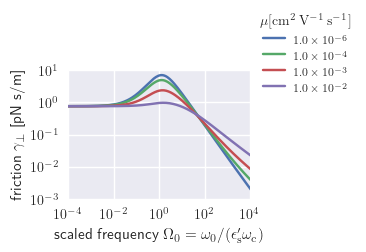

In [133]:
figs['07'] = plot_friction_list(expt, ['03a', '03b', '03c', '03d'], scaled=True)
figs['07'].gca().set_xlim([1e-4,1e+4]);
figs['07'].gca().set_ylim([1e-3,1e+1]);
figs['07'].axes[0].legend(
    [latex_float(mu.to('cm^2/(V s)').magnitude) for mu in mu_list], 
    title=r'$\mu [\mathrm{cm}^{2} \: \mathrm{V}^{-1} \: \mathrm{s}^{-1}]$',
    fontsize=8,
    title_fontsize=10,
    frameon=False,
    bbox_to_anchor=(1, 0.75))
figs['07'].tight_layout()

Ok, this reproduces the major results of Study 74 using the new code in `dissipation19e.py`.

# LDS spectra revisited

Examine the LDS spectrum predicted by Roger Loring when *both* a DC and an AC voltage are present, the so-called LDSO spectrum, where "O" stands for *offset*.  

1. Set the conductivity to give a roll-off frequency $10^3 \: \mathrm{Hz}$.
2. Set the mobility to give a high charge density, so the LDS frequency shift is large at small $\omega_{\mathrm{m}}$.
3. Set the real part of the dielectric constant to 2.8.

Set the conductivity and mobility, and compute the associated charge density.

In [141]:
sigma = ureg.Quantity(1E-9, 'S/cm')
mu = ureg.Quantity(6e-9, 'cm^2/(V s)') 
rho = (sigma / (qe * mu)).to('1/m^3')

Confirm that the charge density is large, putting us in the metallic-sample limit of Figure 3 above.

In [142]:
print(f"charge density = {rho.to('1/cm^3').magnitude:0.1e} cm^{-3}")

charge density = 1.0e+18 cm^-3


Now set up the sample.

In [128]:
sample3 = SampleModel3(
    cantilever = cantilever,
    epsilon_s = ureg.Quantity(complex(2.8, -0.20), ''),
    sigma = sigma,
    rho = rho,
    z_r = ureg.Quantity(1, 'nm'))

sample3_jit = SampleModel3Jit(**sample3.args())

A shorthand for the unitless array of modulation frequencies.

In [129]:
x = omega_m__array.to('Hz').magnitude

Compute $\Delta f_{\mathrm{DC}}$ and $\Delta f_{\mathrm{LSD}}$ with $V_0 = 1 \: \mathrm{V}$ (set in `cantilever`).

In [130]:
obj2 = pointprobeCobject(sample3_jit)
obj2.addsphere(h)
obj2.set_breakpoints(15)
df_DC = obj2.DC()
df_LDS = obj2.LDS(x)

Compute $\Delta f_{\mathrm{LSDO}}$ with $V_0 = 1 \: \mathrm{V}$ and 

- the AC voltage *on*, $V_{\mathrm{m}} = 1 \: \mathrm{V}$, and 
- the AC voltage *off*, $V_{\mathrm{m}} = 0 \: \mathrm{V}$.

In [ ]:
df_LDSO_off = obj2.LDSO(1.0,  0., x)
df_LDSO_on  = obj2.LDSO(1.0, 1.0, x)

A utility plotting function.

In [131]:
def plotme1():
    
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(9.50, 2.5))
    
    labels = ['$\Delta f_{\mathrm{DC}}$', 
              '$\Delta f_{\mathrm{LDS}}$', 
              '$\Delta f_{\mathrm{LDSO}}^{\mathrm{off}}$',
              '$\Delta f_{\mathrm{LDSO}}^{\mathrm{on}}$',
              '$\Delta f_{\mathrm{LDSO}}^{\mathrm{on}} - \Delta f_{\mathrm{LDSO}}^{\mathrm{off}}$']
    
    ys = [df_DC * np.ones_like(x),
          df_LDS,
          df_LDSO_off,
          df_LDSO_on,
          df_LDSO_on - df_LDSO_off]
    
    ax[0].set_ylabel('frequency shift [Hz]')
    for index, (label, y) in enumerate(zip(labels, ys)):

        ax[index].semilogx(x, y)
        ax[index].set_title(label)
        ax[index].set_xlabel('$\omega_{\mathrm{m}}$ [Hz]')
        
    fig.align_ylabels()
    plt.tight_layout()
    
    return fig

We see the expected behaviors:

1. the low-frequency limit of the LDS frequency shift is half the DC frequency shift,
2. the LDSO frequency shift with the AC voltage off equals the DC frequency shift,
3. the LDSO frequency shift with the AC voltage on is the sum of the DC and the LDS frequency shift, and
4. $\Delta f_{\mathrm{LDSO}}^{\mathrm{on}} - \Delta f_{\mathrm{LDSO}}^{\mathrm{off}}$ equals $\Delta f_{\mathrm{LDS}}$.

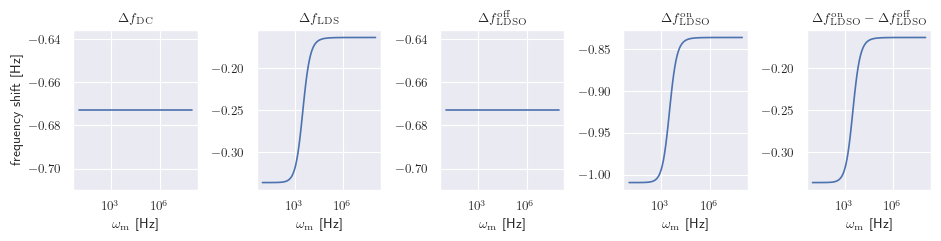

In [132]:
figs['08'] = plotme1()

::: {.content-hidden when-format="html"}

# Save the figures

In [143]:
if 1:
    for num in figs.keys():
        figname = THIS + "Fig-" + num
        figs[num].savefig(figname + '.png', dpi=300)
        figs[num].savefig(figname + '.pdf')

# Formatting notes

The header at the top of this file is for creating a nicely-formatted `.html` document using the program `quarto` ([link](https://quarto.org/)).  During development you can run the following command to render and display an `html` file on the fly.

    quarto preview dissipation-theory--Study-75.ipynb

When you are done developing this notebook, run  `quarto` from the command line as follows to create a nicely-formated `.html` version of the notebook.

    quarto render dissipation-theory--Study-75.ipynb && open dissipation-theory--Study-75.html
    
:::